In [1]:
import json
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_formats = ['retina']

In [2]:
y_scaler = pickle.load(open("artifacts/y_scaler.pkl", "rb"))

In [3]:
models = {
  "lstm_64": "logs/cross_val_lstm_64.json",
  "lstm_256": "logs/cross_val_lstm_256.json",
  "bilstm_64": "logs/cross_val_bilstm_64.json",
  "bilstm_256": "logs/cross_val_bilstm_256.json",
  "lstm2_64_32": "logs/cross_val_lstm2_64_32.json",
  "lstm2_256_128": "logs/cross_val_lstm2_256_128.json",
  "bilstm2_64_32": "logs/cross_val_bilstm2_64_32.json",
  "bilstm2_256_128": "logs/cross_val_bilstm2_256_128.json",
  "lstm3_64_32_16": "logs/cross_val_lstm3_64_32_16.json",
  "attention_lstm_64": "logs/cross_val_attention_lstm_64.json",
  "attention_lstm_256": "logs/cross_val_attention_lstm_256.json"
}

logs = dict()
rows = []

for name, log in models.items():
  with open(log, "r") as f:
    logs[name] = json.loads(f.read())

  for fold, losses in logs[name].items():
    rows.append((name, fold, min(losses["val_loss"])))

df = pd.DataFrame(rows, columns=["name", "fold", "loss"])

In [4]:
pd.pivot_table(df, values=["loss"], index=["name", "fold"], sort=False)

loss
name               fold            
lstm_64            fold_0  0.063620
                   fold_1  0.020103
                   fold_2  0.024327
                   fold_3  0.017905
                   fold_4  0.114264
lstm_256           fold_0  0.053785
                   fold_1  0.017097
                   fold_2  0.018548
                   fold_3  0.017296
                   fold_4  0.082349
bilstm_64          fold_0  0.167797
                   fold_1  0.029439
                   fold_2  0.020931
                   fold_3  0.023405
                   fold_4  0.140971
bilstm_256         fold_0  0.094558
                   fold_1  0.020008
                   fold_2  0.019943
                   fold_3  0.020238
                   fold_4  0.095550
lstm2_64_32        fold_0  0.096938
                   fold_1  0.024230
                   fold_2  0.024183
                   fold_3  0.024569
                   fold_4  0.133113
lstm2_256_128      fold_0  0.071486
                   fold_1  0.022206
                   fold_2  0.019947
                   fold_3  0.017541
                   fold_4  0.098759
bilstm2_64_32      fold_0  0.152804
                   fold_1  0.027473
                   fold_2  0.026458
                   fold_3  0.036692
                   fold_4  0.278361
bilstm2_256_128    fold_0  0.095327
                   fold_1  0.022457
                   fold_2  0.020243
                   fold_3  0.020089
                   fold_4  0.116785
lstm3_64_32_16     fold_0  0.134202
                   fold_1  0.042460
                   fold_2  0.038428
                   fold_3  0.046798
                   fold_4  0.377733
attention_lstm_64  fold_0  0.265932
                   fold_1  0.102313
                   fold_2  0.171360
                   fold_3  0.077021
                   fold_4  0.473650
attention_lstm_256 fold_0  0.249568
                   fold_1  0.049915
                   fold_2  0.202263
                   fold_3  0.063769
                   fold_4  0.441289

In [5]:
pd.pivot_table(
  df,
  values=["loss"],
  index=["name"],
  aggfunc={"loss": [np.min, np.max, np.mean, np.std]},
  sort=False
)

loss                              
                        amin      amax      mean       std
name                                                      
lstm_64             0.017905  0.114264  0.048044  0.041471
lstm_256            0.017097  0.082349  0.037815  0.029410
bilstm_64           0.020931  0.167797  0.076509  0.071787
bilstm_256          0.019943  0.095550  0.050059  0.041076
lstm2_64_32         0.024183  0.133113  0.060606  0.051297
lstm2_256_128       0.017541  0.098759  0.045988  0.037040
bilstm2_64_32       0.026458  0.278361  0.104358  0.110885
bilstm2_256_128     0.020089  0.116785  0.054980  0.047248
lstm3_64_32_16      0.038428  0.377733  0.127924  0.145206
attention_lstm_64   0.077021  0.473650  0.218055  0.160537
attention_lstm_256  0.049915  0.441289  0.201361  0.159498

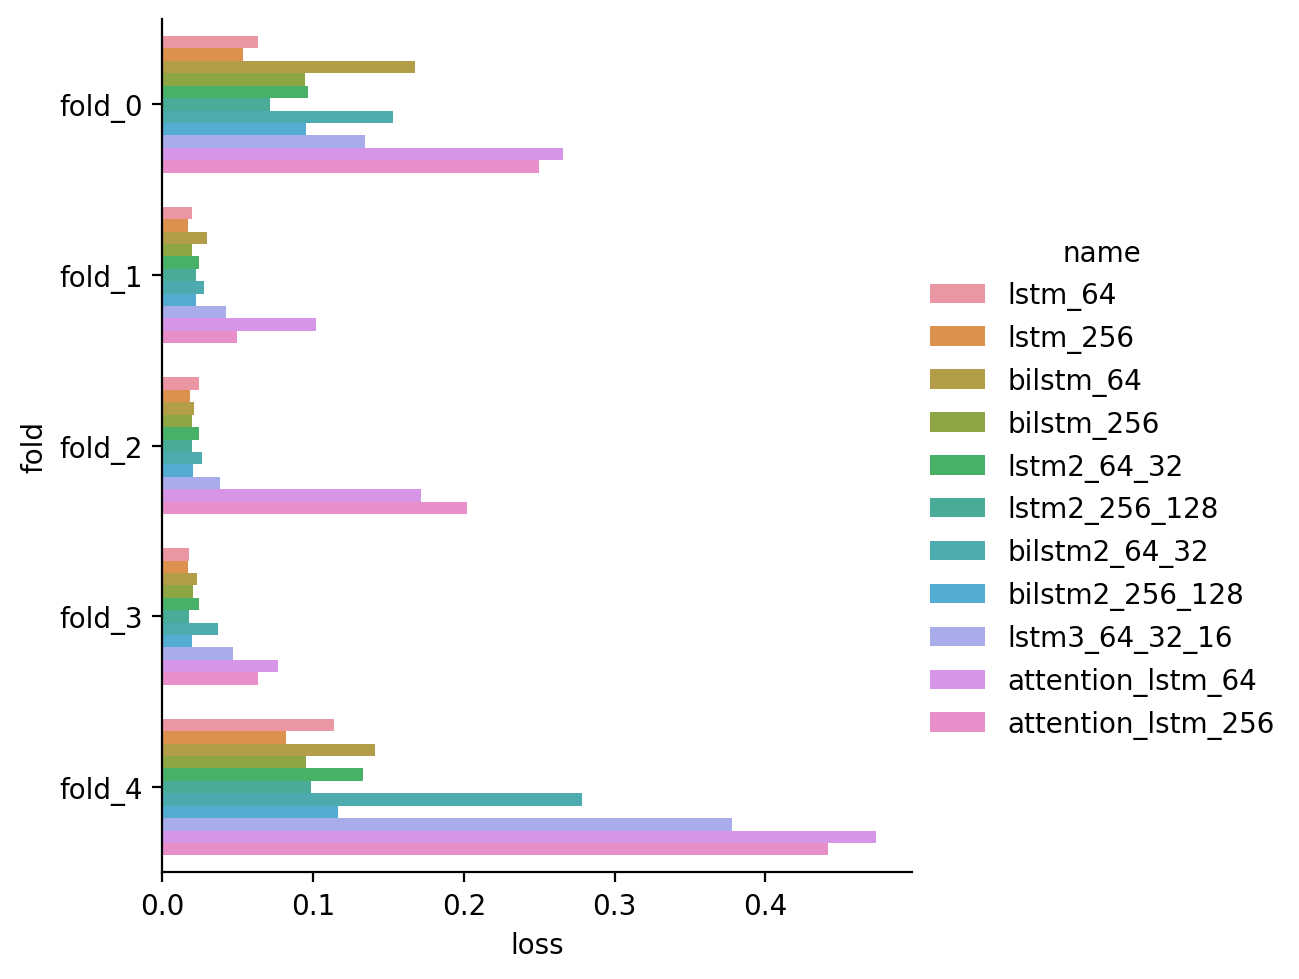

In [6]:
sns.catplot(
  data=df,
  kind="bar",
  x="loss",
  y="fold",
  hue="name",
  # height=6,
  orient="h"
)
plt.show()

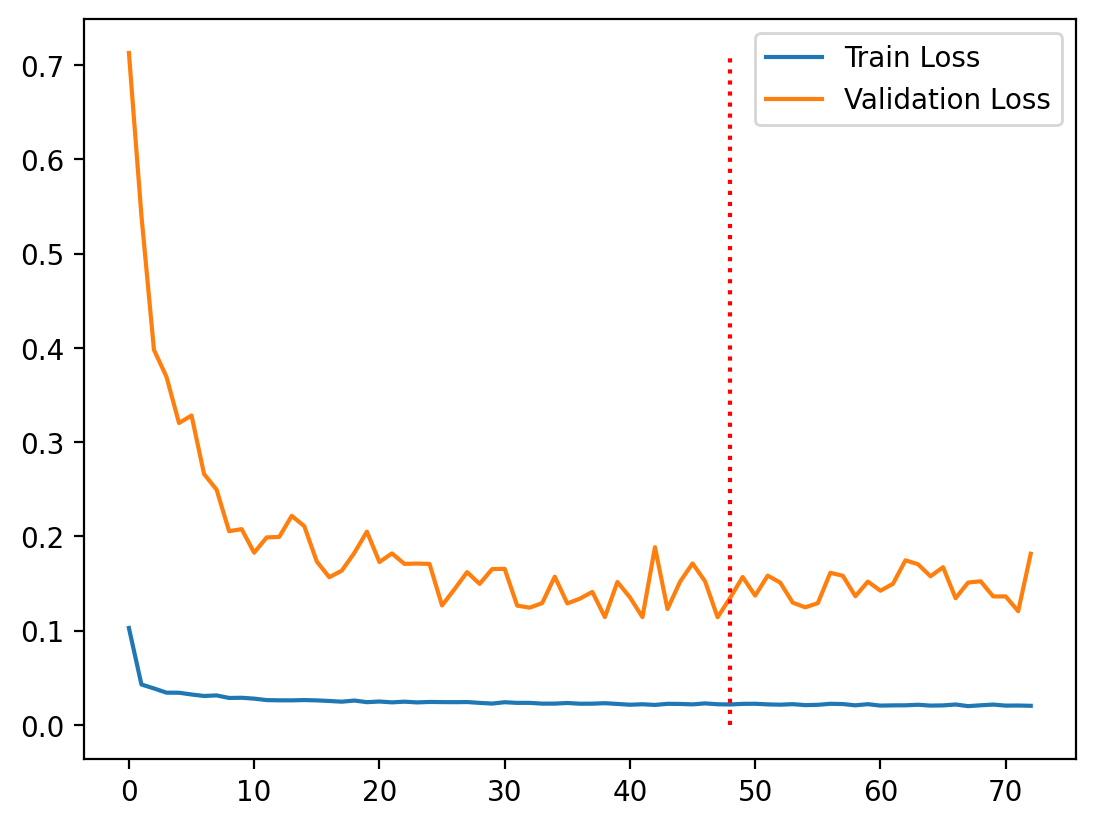

In [7]:
model_name = "lstm_64"
fold_name = "fold_4"

y1 = logs[model_name][fold_name]["loss"]
y2 = logs[model_name][fold_name]["val_loss"]

plt.plot(y1)
plt.plot(y2)

plt.vlines(len(y1) - 25, ymin=0, ymax=np.max(y1 + y2), colors="red", linestyles="dotted")
plt.legend(["Train Loss", "Validation Loss"])

plt.show()